In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Layers import *
from Solver import *
from Classifier import *

In [18]:
# first step would be to import the dataset
X_full = pd.read_csv('./red_wine_dataset.csv')
percentage = 0.8
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [19]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 16)
(320, 16)
float64
(1279,)


In [20]:
# #classic way to plot the data
# for i in range(x_train.shape[0]):
#     if(y_train[i] == 1):
#         plt.scatter(x_train[i,0], x_train[i,1], color='red')
#     else:
#         plt.scatter(x_train[i,0], x_train[i,1], color='blue')
# plt.xlabel('fixed acidity')
# plt.ylabel('volatile acidity')
# plt.title('Red Wine Dataset')
# plt.show()

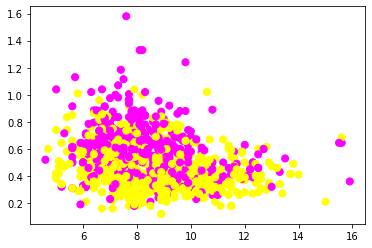

In [21]:
#quicker way to plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
plt.show()

3.999927832269524e-16


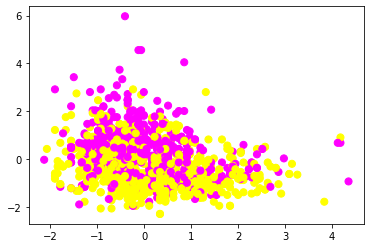

In [22]:
#Normalizing the data (mean=0, std=1)
x_train = x_train - x_train.mean(axis = 0)
x_train = x_train / x_train.std(axis = 0)
#quicker way to plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
plt.show()


In [23]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1], 1)
b = np.zeros((1, 1))
op, cache_sigmoid = sigmoid_forward(x_train[15:20], w, b )
# print(op)
loss,cache_logistic = cross_entropy_loss(op, y_train[15:20])
print("old loss = ", loss)
grads = cross_entropy_loss_backward(cache_logistic)
# print(grads.shape,'\n', grads)
dw, db = sigmoid_backward(grads, cache_sigmoid)
print(dw)
# print(db.shape)
b = b - 0.1 * db
w = w - 0.1 * dw
op_new,cache_sigmoid = sigmoid_forward(x_train[15:20], w, b)
loss, cache_logistic = cross_entropy_loss(op_new, y_train[15:20].reshape(-1,1))
print("new loss = ",loss)




old loss =  [9.53929371]
[[ 0.74103969]
 [ 1.92384508]
 [-0.93967353]
 [ 1.13056768]
 [ 1.09259298]
 [-2.28836489]
 [-0.60025259]
 [ 3.0633428 ]
 [-0.96473569]
 [-2.9897273 ]
 [-3.51712174]
 [ 0.95631136]
 [ 0.95631136]
 [-2.35572104]
 [ 1.41999691]
 [ 1.0724019 ]]
new loss =  [4.73489546]


In [25]:
simplelogistic = Logisitic_Classifier(input_dim=x_train.shape[1], reg = 0.5)

In [28]:
SGD = Solver(simplelogistic, x_train, y_train, lr = 1e-4, batch_size = 15, num_epochs = 5000, print_every = 1000)
SGD.train()

Epoch =  0 Batch =  0 Loss =  [10.38493373] Gradient_max =  5.32391708644967 learning rate =  0.0001
Epoch =  1 Batch =  0 Loss =  [10.22336544] Gradient_max =  5.096499845642786 learning rate =  0.0001
Epoch =  2 Batch =  0 Loss =  [10.08531354] Gradient_max =  4.885536238779455 learning rate =  0.0001
Epoch =  3 Batch =  0 Loss =  [9.96744675] Gradient_max =  4.6900565438605115 learning rate =  0.0001
Epoch =  4 Batch =  0 Loss =  [9.86688144] Gradient_max =  4.509029558172069 learning rate =  0.0001
Epoch =  5 Batch =  0 Loss =  [9.78113431] Gradient_max =  4.341409005281927 learning rate =  0.0001
Epoch =  6 Batch =  0 Loss =  [9.70807478] Gradient_max =  4.186166687603289 learning rate =  0.0001
Epoch =  7 Batch =  0 Loss =  [9.64587944] Gradient_max =  4.042314823600674 learning rate =  0.0001
Epoch =  8 Batch =  0 Loss =  [9.59299021] Gradient_max =  3.908919977142324 learning rate =  0.0001
Epoch =  9 Batch =  0 Loss =  [9.54807672] Gradient_max =  3.785110715629328 learning ra

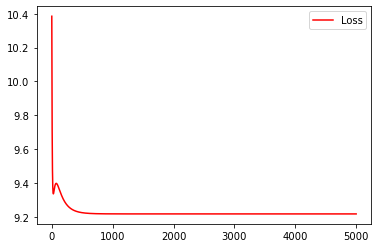

In [29]:
epochs = range(0,SGD.num_epochs)
plt.plot(epochs, SGD.loss_history, label = 'Loss', color = 'red')
plt.legend()
plt.show()

In [30]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]


training_accuracy(simplelogistic, x_train, y_train)


0.745113369820172

In [31]:
def test_accuracy(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

x_test_new = x_test - np.mean(x_test, axis = 0)
x_test_new = x_test_new / np.std(x_test_new, axis = 0)
test_accuracy(simplelogistic, x_test_new, y_test)


0.74375